# Data Wrangling and Visualization


### Coding Problem: Data Wrangling and Visualization Challenge

You are given a dataset representing the performance of students across multiple subjects in a wide format. Your task is to reshape the data into a long format, apply a transformation to a specific column, combine the data with additional student details, and finally, create a categorical plot showing the relationship between student performance and another variable.

### Problem Description

1. **Wide Format Data**: You have the following DataFrame `df_scores` in wide format:

   ```python
   import pandas as pd
   
   data = {
       
      'Student': ['Alice', 'Bob', 'Charlie', 'David'],
       'Math': [85, 90, 78, 88],
       'Science': [92, 85, 80, 91],
       'English': [88, 87, 82, 85]
   }

   df_scores = pd.DataFrame(data)

   ```

2. **Task 1**: Reshape the `df_scores` DataFrame from wide format to long format using `melt`. The long-form DataFrame should contain three columns: `Student`, `Subject`, and `Score`.

3. **Task 2**: Write a function `grade_category` that takes a score as input and returns:
   - `'A'` if the score is 90 or above,
   - `'B'` if the score is between 80 and 89,
   - `'C'` if the score is between 70 and 79,
   - `'D'` if the score is below 70.

   Use the `map` function to apply this transformation to the `Score` column and create a new column `Grade` in the reshaped DataFrame.

4. **Task 3**: You are given another DataFrame `df_details` with additional details about each student:

   ```python
   data_details = {
       'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
       'Age': [15, 16, 15, 17, 16],
       'Gender': ['F', 'M', 'M', 'M', 'F']
   }

   df_details = pd.DataFrame(data_details)
   ```

   Merge `df_scores` (reshaped long form) with `df_details` based on the `Student` column using an left merge.

5. **Task 4**: Drop rows that contain any missing values from the merged DataFrame.

6. **Task 5**: Using the final DataFrame, create a **categorical bar plot** that shows the average `Score` for each `Subject`, broken down by `Gender`.

### Final Output
- You should submit the following:
  - The final reshaped and transformed DataFrame after merging and dropping missing values.
  - The plot showing the average scores of students by subject and gender.

### Example Input DataFrames:
`df_scores` (wide form):
  
| Student  | Math | Science | English |
|----------|------|---------|---------|
| Alice    | 85   | 92      | 88      |
| Bob      | 90   | 85      | 87      |
| Charlie  | 78   | 80      | 82      |
| David    | 88   | 91      | 85      |
  
`df_details`:
  
| Student  | Age  | Gender |
|----------|------|--------|
| Alice    | 15   | F      |
| Bob      | 16   | M      |
| Charlie  | 15   | M      |
| David    | 17   | M      |
| Eve      | 16   | F      |

### Hints
- Use `pd.melt()` to reshape the data.
- Use `map()` with a custom function to create the grade categories.
- Use `pd.merge()` to merge two DataFrames.
- Use `dropna()` to remove rows with missing values.
- Use `seaborn` or `matplotlib` to create the categorical bar plot.


In [ ]:
# Your code here . . .
import pandas as pd

data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David'],
    'Math': [85, 90, 78, 88],
    'Science': [92, 85, 80, 91],
    'English': [88, 87, 82, 85]
}


In [ ]:
#Task 1
df_scores = pd.DataFrame(data)

df_scores_melt = pd.melt(df_scores, id_vars=['Student'], var_name="Subject", value_name="Score")
df_scores_melt

,Student,Subject,Score
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
3,David,Math,88
4,Alice,Science,92
5,Bob,Science,85
6,Charlie,Science,80
7,David,Science,91
8,Alice,English,88
9,Bob,English,87


In [ ]:
#Task 2
def grade_category(score):
  if score >=90:
    return 'A'
  elif 80 <= score <= 89:
    return 'B'
  elif 70 <= score <= 79:
    return 'C'
  else:
    return 'D'

df_scores_melt['Grade'] = df_scores_melt['Score'].map(grade_category)
df_scores_melt

,Student,Subject,Score,Grade
0,Alice,Math,85,B
1,Bob,Math,90,A
2,Charlie,Math,78,C
3,David,Math,88,B
4,Alice,Science,92,A
5,Bob,Science,85,B
6,Charlie,Science,80,B
7,David,Science,91,A
8,Alice,English,88,B
9,Bob,English,87,B


In [ ]:
#Task 3
data_details = {
       'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
       'Age': [15, 16, 15, 17, 16],
       'Gender': ['F', 'M', 'M', 'M', 'F']
   }

df_details = pd.DataFrame(data_details)

df_merged = pd.merge(df_scores_melt, df_details, on='Student', how='left')
df_merged



,Student,Subject,Score,Grade,Age,Gender
0,Alice,Math,85,B,15,F
1,Bob,Math,90,A,16,M
2,Charlie,Math,78,C,15,M
3,David,Math,88,B,17,M
4,Alice,Science,92,A,15,F
5,Bob,Science,85,B,16,M
6,Charlie,Science,80,B,15,M
7,David,Science,91,A,17,M
8,Alice,English,88,B,15,F
9,Bob,English,87,B,16,M


In [ ]:
#Task 4
df_dropped = df_merged.dropna()
df_dropped

,Student,Subject,Score,Grade,Age,Gender
0,Alice,Math,85,B,15,F
1,Bob,Math,90,A,16,M
2,Charlie,Math,78,C,15,M
3,David,Math,88,B,17,M
4,Alice,Science,92,A,15,F
5,Bob,Science,85,B,16,M
6,Charlie,Science,80,B,15,M
7,David,Science,91,A,17,M
8,Alice,English,88,B,15,F
9,Bob,English,87,B,16,M


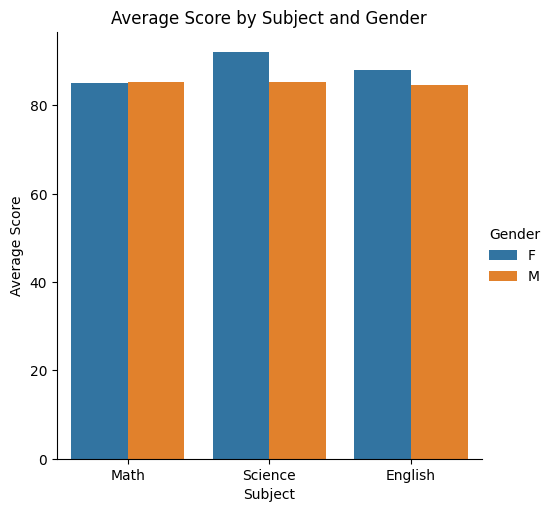

In [ ]:
#Task 5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df_dropped, x= 'Subject', y='Score', hue='Gender', kind = 'bar', errorbar=None)
# Customize plot
plt.title('Average Score by Subject and Gender')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()



